## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

D:\Program Files\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    """Code Here
    建立你的神經網路
    """
    return model

In [6]:
"""Code Here
設定超參數
"""
#MOMENTUM設定為
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.75]

### nesterov=True

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    for mt in MOMENTUM:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=mt)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "exp-lr-%s-mt-%s" % (str(lr),str(mt))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 269us/step - loss: 2.1059 - acc: 0.2269 - val_loss: 1.8683 - val_acc: 0.3247
Epoch 2/50
50000/50000 [==============================] - 13s 258us/step - loss: 1.9632 - acc: 0.2857 - val_loss: 1.8960 - val_acc: 0.2932
Epoch 3/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.8944 - acc: 0.3140 - val_loss: 1.8898 - val_acc: 0.3124
Epoch 4/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.7670 - acc: 0.3634 - val_loss: 1.8290 - val_acc: 0.3536
Epoch 5/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.6740 - acc: 0.4021 - val_loss: 1.7096 - val_acc: 0.3906
Epoch 6/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.6388 - acc: 0.4139 - val_loss: 1.6601 - val_acc: 0.3998
Epoch 7/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.5921 - acc: 0.4308 - val_loss: 1.

50000/50000 [==============================] - 13s 263us/step - loss: 1.8193 - acc: 0.3502 - val_loss: 1.6615 - val_acc: 0.4020
Epoch 2/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.5971 - acc: 0.4343 - val_loss: 1.5392 - val_acc: 0.4562
Epoch 3/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.5085 - acc: 0.4637 - val_loss: 1.5512 - val_acc: 0.4448
Epoch 4/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.4540 - acc: 0.4846 - val_loss: 1.5552 - val_acc: 0.4493
Epoch 5/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.4030 - acc: 0.5024 - val_loss: 1.4623 - val_acc: 0.4801
Epoch 6/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.3641 - acc: 0.5149 - val_loss: 1.4375 - val_acc: 0.4926
Epoch 7/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.3287 - acc: 0.5286 - val_loss: 1.4907 - val_acc: 0.4786
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.7396 - acc: 0.3838 - val_loss: 1.8063 - val_acc: 0.3465
Epoch 3/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.6522 - acc: 0.4167 - val_loss: 1.6259 - val_acc: 0.4219
Epoch 4/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.5917 - acc: 0.4369 - val_loss: 1.6567 - val_acc: 0.4097
Epoch 5/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.5474 - acc: 0.4548 - val_loss: 1.6426 - val_acc: 0.4275
Epoch 6/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.5105 - acc: 0.4648 - val_loss: 1.5470 - val_acc: 0.4568
Epoch 7/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.4757 - acc: 0.4802 - val_loss: 1.5682 - val_acc: 0.4324
Epoch 8/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.4429 - acc: 0.4918 - val_loss: 1.4983 - val_acc: 0.4623
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.7244 - acc: 0.3958 - val_loss: 1.7043 - val_acc: 0.4011
Epoch 4/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.6648 - acc: 0.4159 - val_loss: 1.6464 - val_acc: 0.4163
Epoch 5/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.6157 - acc: 0.4334 - val_loss: 1.6182 - val_acc: 0.4306
Epoch 6/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.5745 - acc: 0.4465 - val_loss: 1.5922 - val_acc: 0.4373
Epoch 7/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.5399 - acc: 0.4600 - val_loss: 1.5423 - val_acc: 0.4542
Epoch 8/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.5069 - acc: 0.4709 - val_loss: 1.5218 - val_acc: 0.4620
Epoch 9/50
50000/50000 [==============================] - 13s 258us/step - loss: 1.4801 - acc: 0.4802 - val_loss: 1.4961 - val_acc: 0.4716
Epoch 10/50
50000/50000 [==

Epoch 4/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.8709 - acc: 0.3485 - val_loss: 1.8562 - val_acc: 0.3546
Epoch 5/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.8352 - acc: 0.3611 - val_loss: 1.8235 - val_acc: 0.3566
Epoch 6/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.8075 - acc: 0.3708 - val_loss: 1.8063 - val_acc: 0.3710
Epoch 7/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.7856 - acc: 0.3766 - val_loss: 1.7816 - val_acc: 0.3698
Epoch 8/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.7654 - acc: 0.3838 - val_loss: 1.7606 - val_acc: 0.3779
Epoch 9/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.7477 - acc: 0.3894 - val_loss: 1.7422 - val_acc: 0.3876
Epoch 10/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.7321 - acc: 0.3951 - val_loss: 1.7286 - val_acc: 0.3945
Epoch 11/50
50000/50000 [=

Epoch 5/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.9524 - acc: 0.3186 - val_loss: 1.9359 - val_acc: 0.3219
Epoch 6/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.9180 - acc: 0.3312 - val_loss: 1.9049 - val_acc: 0.3370
Epoch 7/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.8904 - acc: 0.3400 - val_loss: 1.8802 - val_acc: 0.3456
Epoch 8/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.8676 - acc: 0.3477 - val_loss: 1.8601 - val_acc: 0.3507
Epoch 9/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.8481 - acc: 0.3560 - val_loss: 1.8419 - val_acc: 0.3598
Epoch 10/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.8309 - acc: 0.3612 - val_loss: 1.8257 - val_acc: 0.3629
Epoch 11/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.8163 - acc: 0.3674 - val_loss: 1.8116 - val_acc: 0.3682
Epoch 12/50
50000/50000 [

Epoch 6/50
50000/50000 [==============================] - 14s 276us/step - loss: 2.1579 - acc: 0.2251 - val_loss: 2.1489 - val_acc: 0.2327
Epoch 7/50
50000/50000 [==============================] - 13s 255us/step - loss: 2.1382 - acc: 0.2357 - val_loss: 2.1304 - val_acc: 0.2393
Epoch 8/50
50000/50000 [==============================] - 13s 253us/step - loss: 2.1202 - acc: 0.2460 - val_loss: 2.1132 - val_acc: 0.2484
Epoch 9/50
50000/50000 [==============================] - 13s 253us/step - loss: 2.1035 - acc: 0.2546 - val_loss: 2.0974 - val_acc: 0.2585
Epoch 10/50
50000/50000 [==============================] - 12s 250us/step - loss: 2.0880 - acc: 0.2638 - val_loss: 2.0824 - val_acc: 0.2620
Epoch 11/50
50000/50000 [==============================] - 13s 252us/step - loss: 2.0734 - acc: 0.2691 - val_loss: 2.0682 - val_acc: 0.2725
Epoch 12/50
50000/50000 [==============================] - 13s 256us/step - loss: 2.0598 - acc: 0.2760 - val_loss: 2.0551 - val_acc: 0.2783
Epoch 13/50
50000/50000 

Epoch 7/50
50000/50000 [==============================] - 13s 261us/step - loss: 2.1765 - acc: 0.2362 - val_loss: 2.1705 - val_acc: 0.2402
Epoch 8/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.1623 - acc: 0.2435 - val_loss: 2.1570 - val_acc: 0.2457
Epoch 9/50
50000/50000 [==============================] - 13s 255us/step - loss: 2.1493 - acc: 0.2491 - val_loss: 2.1444 - val_acc: 0.2512
Epoch 10/50
50000/50000 [==============================] - 13s 251us/step - loss: 2.1370 - acc: 0.2525 - val_loss: 2.1325 - val_acc: 0.2547
Epoch 11/50
50000/50000 [==============================] - 13s 256us/step - loss: 2.1254 - acc: 0.2570 - val_loss: 2.1212 - val_acc: 0.2585
Epoch 12/50
50000/50000 [==============================] - 13s 256us/step - loss: 2.1144 - acc: 0.2607 - val_loss: 2.1107 - val_acc: 0.2643
Epoch 13/50
50000/50000 [==============================] - 13s 258us/step - loss: 2.1041 - acc: 0.2647 - val_loss: 2.1007 - val_acc: 0.2706
Epoch 14/50
50000/50000

Epoch 8/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.2755 - acc: 0.1492 - val_loss: 2.2721 - val_acc: 0.1533
Epoch 9/50
50000/50000 [==============================] - 13s 259us/step - loss: 2.2697 - acc: 0.1533 - val_loss: 2.2665 - val_acc: 0.1568
Epoch 10/50
50000/50000 [==============================] - 12s 249us/step - loss: 2.2643 - acc: 0.1569 - val_loss: 2.2614 - val_acc: 0.1612
Epoch 11/50
50000/50000 [==============================] - 13s 252us/step - loss: 2.2593 - acc: 0.1604 - val_loss: 2.2565 - val_acc: 0.1642
Epoch 12/50
50000/50000 [==============================] - 13s 254us/step - loss: 2.2546 - acc: 0.1639 - val_loss: 2.2519 - val_acc: 0.1651
Epoch 13/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.2500 - acc: 0.1664 - val_loss: 2.2474 - val_acc: 0.1696
Epoch 14/50
50000/50000 [==============================] - 13s 264us/step - loss: 2.2456 - acc: 0.1688 - val_loss: 2.2431 - val_acc: 0.1717
Epoch 15/50
50000/5000

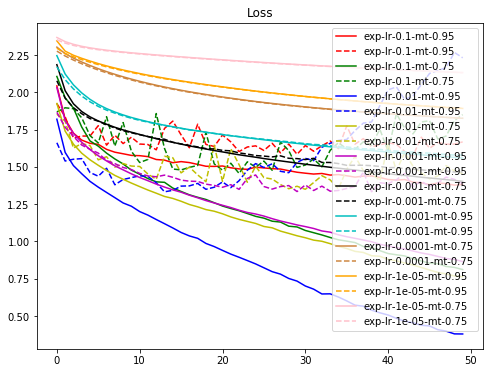

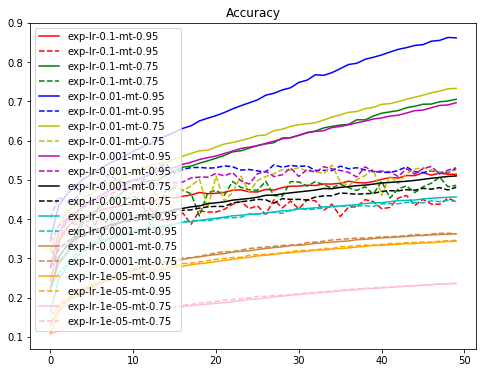

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "peru" , "orange", "pink"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### nesterov=False

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    for mt in MOMENTUM:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=mt)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "exp-lr-%s-mt-%s" % (str(lr),str(mt))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.9889 - acc: 0.2737 - val_loss: 1.9157 - val_acc: 0.3028
Epoch 2/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.7514 - acc: 0.3694 - val_loss: 1.7432 - val_acc: 0.3813
Epoch 3/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.6705 - acc: 0.4046 - val_loss: 1.6665 - val_acc: 0.4089
Epoch 4/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.6002 - acc: 0.4268 - val_loss: 1.5941 - val_acc: 0.4319
Epoch 5/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.5427 - acc: 0.4477 - val_loss: 1.7016 - val_acc: 0.4018
Epoch 6/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.5053 - acc: 0.4613 - val_loss: 1.6189 - val_acc: 0.4211
Epoch 7/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.4707 - acc: 0.4732 - val_loss: 1.

50000/50000 [==============================] - 13s 251us/step - loss: 1.8944 - acc: 0.3144 - val_loss: 1.7237 - val_acc: 0.3857
Epoch 2/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.6786 - acc: 0.4008 - val_loss: 1.6002 - val_acc: 0.4261
Epoch 3/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.5940 - acc: 0.4326 - val_loss: 1.5391 - val_acc: 0.4540
Epoch 4/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.5412 - acc: 0.4500 - val_loss: 1.6102 - val_acc: 0.4224
Epoch 5/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.4833 - acc: 0.4695 - val_loss: 1.5037 - val_acc: 0.4642
Epoch 6/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.4476 - acc: 0.4848 - val_loss: 1.4406 - val_acc: 0.4892
Epoch 7/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.4170 - acc: 0.4938 - val_loss: 1.4389 - val_acc: 0.4881
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 13s 250us/step - loss: 1.9431 - acc: 0.3045 - val_loss: 1.8203 - val_acc: 0.3573
Epoch 2/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.7364 - acc: 0.3861 - val_loss: 1.7002 - val_acc: 0.4064
Epoch 3/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.6539 - acc: 0.4142 - val_loss: 1.6582 - val_acc: 0.4050
Epoch 4/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.5988 - acc: 0.4343 - val_loss: 1.6034 - val_acc: 0.4197
Epoch 5/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.5451 - acc: 0.4533 - val_loss: 1.5370 - val_acc: 0.4599
Epoch 6/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.5076 - acc: 0.4681 - val_loss: 1.6140 - val_acc: 0.4303
Epoch 7/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.4724 - acc: 0.4799 - val_loss: 1.4843 - val_acc: 0.4701
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 13s 266us/step - loss: 2.0440 - acc: 0.2639 - val_loss: 1.8789 - val_acc: 0.3451
Epoch 2/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.8233 - acc: 0.3606 - val_loss: 1.7628 - val_acc: 0.3895
Epoch 3/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.7363 - acc: 0.3920 - val_loss: 1.6979 - val_acc: 0.4008
Epoch 4/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.6845 - acc: 0.4070 - val_loss: 1.6654 - val_acc: 0.4134
Epoch 5/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.6394 - acc: 0.4243 - val_loss: 1.6074 - val_acc: 0.4403
Epoch 6/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.6004 - acc: 0.4392 - val_loss: 1.5868 - val_acc: 0.4483
Epoch 7/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.5706 - acc: 0.4496 - val_loss: 1.5814 - val_acc: 0.4430
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 12s 244us/step - loss: 2.0071 - acc: 0.2963 - val_loss: 1.9577 - val_acc: 0.3128
Epoch 3/50
50000/50000 [==============================] - 12s 250us/step - loss: 1.9230 - acc: 0.3289 - val_loss: 1.8944 - val_acc: 0.3407
Epoch 4/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.8698 - acc: 0.3501 - val_loss: 1.8534 - val_acc: 0.3533
Epoch 5/50
50000/50000 [==============================] - 12s 250us/step - loss: 1.8329 - acc: 0.3625 - val_loss: 1.8189 - val_acc: 0.3645
Epoch 6/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.8047 - acc: 0.3717 - val_loss: 1.7945 - val_acc: 0.3687
Epoch 7/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.7812 - acc: 0.3796 - val_loss: 1.7725 - val_acc: 0.3762
Epoch 8/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.7622 - acc: 0.3869 - val_loss: 1.7553 - val_acc: 0.3809
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 12s 248us/step - loss: 2.0483 - acc: 0.2718 - val_loss: 2.0182 - val_acc: 0.2929
Epoch 4/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.9977 - acc: 0.2953 - val_loss: 1.9730 - val_acc: 0.3138
Epoch 5/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.9582 - acc: 0.3121 - val_loss: 1.9391 - val_acc: 0.3195
Epoch 6/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.9269 - acc: 0.3233 - val_loss: 1.9117 - val_acc: 0.3340
Epoch 7/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.9018 - acc: 0.3323 - val_loss: 1.8887 - val_acc: 0.3366
Epoch 8/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.8807 - acc: 0.3405 - val_loss: 1.8701 - val_acc: 0.3471
Epoch 9/50
50000/50000 [==============================] - 13s 250us/step - loss: 1.8624 - acc: 0.3458 - val_loss: 1.8546 - val_acc: 0.3532
Epoch 10/50
50000/50000 [==

Epoch 4/50
50000/50000 [==============================] - 12s 250us/step - loss: 2.1979 - acc: 0.2063 - val_loss: 2.1880 - val_acc: 0.2120
Epoch 5/50
50000/50000 [==============================] - 12s 245us/step - loss: 2.1760 - acc: 0.2209 - val_loss: 2.1673 - val_acc: 0.2242
Epoch 6/50
50000/50000 [==============================] - 12s 243us/step - loss: 2.1561 - acc: 0.2322 - val_loss: 2.1482 - val_acc: 0.2320
Epoch 7/50
50000/50000 [==============================] - 12s 242us/step - loss: 2.1378 - acc: 0.2404 - val_loss: 2.1307 - val_acc: 0.2410
Epoch 8/50
50000/50000 [==============================] - 12s 244us/step - loss: 2.1209 - acc: 0.2463 - val_loss: 2.1144 - val_acc: 0.2452
Epoch 9/50
50000/50000 [==============================] - 12s 246us/step - loss: 2.1051 - acc: 0.2528 - val_loss: 2.0993 - val_acc: 0.2519
Epoch 10/50
50000/50000 [==============================] - 12s 246us/step - loss: 2.0904 - acc: 0.2598 - val_loss: 2.0852 - val_acc: 0.2567
Epoch 11/50
50000/50000 [=

50000/50000 [==============================] - 12s 244us/step - loss: 2.2524 - acc: 0.1719 - val_loss: 2.2449 - val_acc: 0.1817
Epoch 5/50
50000/50000 [==============================] - 12s 245us/step - loss: 2.2373 - acc: 0.1918 - val_loss: 2.2303 - val_acc: 0.1979
Epoch 6/50
50000/50000 [==============================] - 12s 241us/step - loss: 2.2230 - acc: 0.2070 - val_loss: 2.2164 - val_acc: 0.2115
Epoch 7/50
50000/50000 [==============================] - 12s 248us/step - loss: 2.2093 - acc: 0.2207 - val_loss: 2.2030 - val_acc: 0.2231
Epoch 8/50
50000/50000 [==============================] - 12s 244us/step - loss: 2.1962 - acc: 0.2302 - val_loss: 2.1903 - val_acc: 0.2316
Epoch 9/50
50000/50000 [==============================] - 14s 274us/step - loss: 2.1839 - acc: 0.2391 - val_loss: 2.1783 - val_acc: 0.2380
Epoch 10/50
50000/50000 [==============================] - 12s 240us/step - loss: 2.1722 - acc: 0.2462 - val_loss: 2.1670 - val_acc: 0.2452
Epoch 11/50
50000/50000 [============

50000/50000 [==============================] - 13s 257us/step - loss: 2.3411 - acc: 0.1063 - val_loss: 2.3332 - val_acc: 0.1134
Epoch 5/50
50000/50000 [==============================] - 12s 245us/step - loss: 2.3263 - acc: 0.1077 - val_loss: 2.3198 - val_acc: 0.1166
Epoch 6/50
50000/50000 [==============================] - 13s 267us/step - loss: 2.3148 - acc: 0.1123 - val_loss: 2.3093 - val_acc: 0.1213
Epoch 7/50
50000/50000 [==============================] - 13s 250us/step - loss: 2.3056 - acc: 0.1194 - val_loss: 2.3009 - val_acc: 0.1284
Epoch 8/50
50000/50000 [==============================] - 12s 245us/step - loss: 2.2983 - acc: 0.1279 - val_loss: 2.2940 - val_acc: 0.1370
Epoch 9/50
50000/50000 [==============================] - 12s 241us/step - loss: 2.2921 - acc: 0.1360 - val_loss: 2.2882 - val_acc: 0.1454
Epoch 10/50
50000/50000 [==============================] - 12s 246us/step - loss: 2.2869 - acc: 0.1435 - val_loss: 2.2831 - val_acc: 0.1495
Epoch 11/50
50000/50000 [============

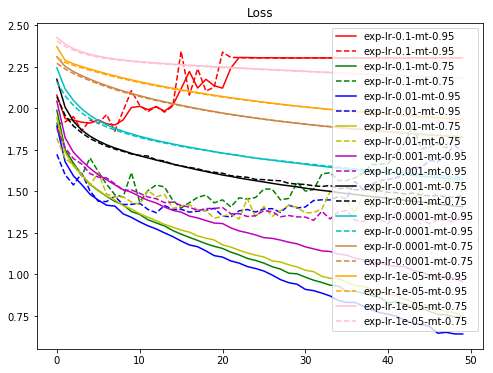

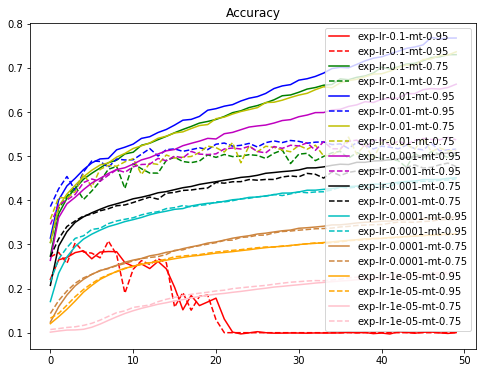

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "peru" , "orange", "pink"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()